In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# 1. Load data from Excel and handle missing values
data = pd.read_excel("EastWestAirlines.xlsx")


In [3]:
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Display the count of missing values for each column
print(data.isnull().sum(), "\n")

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64 



In [8]:
#There are no missing values We can proceed with the rest of the analysis and modeling without needing to handle any missing data.

In [9]:
#Identify and correct any inconsistencies in data types
print(data.dtypes, "\n")


ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object 



In [10]:
#Detect and treat outliers
# Using Z-score to detect outliers in numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(data[numerical_columns]))

In [11]:
# Define a threshold for identifying outliers ( Z-score > 3)
outliers = (z_scores > 3)

In [12]:
# Display outliers
print("Outliers detected:")
print(data[numerical_columns][outliers.any(axis=1)], "\n")

Outliers detected:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
43      44   619393           0          3          1          1        15008   
50      51   108137           0          1          1          1         6368   
65      66    53914           0          3          1          1        33767   
70      72    84409        5031          2          1          1        15436   
...    ...      ...         ...        ...        ...        ...          ...   
3911  3934    55922        2273          1          1          1         8104   
3917  3940   130748           0          4          1          1        65510   
3934  3957    76595           0          1          1          1        10577   
3950  3973    59650           0          1          1          1         5050   
3959  3982    13942           0          1          2          1         5822   

      Bo

In [13]:
# Treat outliers by capping them at the 95th percentile
for column in numerical_columns:
    percentile_95 = data[column].quantile(0.95)
    data[column] = np.where(data[column] > percentile_95, percentile_95, data[column])

In [14]:
# Scale features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [15]:
# Check the shape of the scaled features
print("Scaled features shape:", scaled_features.shape)

Scaled features shape: (3999, 12)


In [16]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
data['KMeans_Cluster'] = kmeans.labels_

C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# Clustering with AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(scaled_features)
data['Agg_Cluster'] = agg_clustering.labels_

In [18]:
# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)
data['DBSCAN_Cluster'] = dbscan.labels_

In [19]:
# Evaluate clustering using silhouette score
kmeans_silhouette = silhouette_score(scaled_features, data['KMeans_Cluster'])
agg_silhouette = silhouette_score(scaled_features, data['Agg_Cluster'])
dbscan_silhouette = silhouette_score(scaled_features, data['DBSCAN_Cluster'])

In [20]:
print("KMeans Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

KMeans Silhouette Score: 0.2861763438656772
Agglomerative Clustering Silhouette Score: 0.23809101000811242
DBSCAN Silhouette Score: -0.35124780674651623


In [21]:
"""
K-Means Clustering: This score indicates that the clusters formed by K-Means are somewhat distinct but not very strong. 
Agglomerative (Hierarchical) Clustering: This score is slightly lower than that of K-Means, suggesting that the 
        hierarchical clustering method did not perform as well in separating the clusters.
DBSCAN Clustering: A negative silhouette score indicates that the DBSCAN clustering might not be appropriate for this 
                   dataset, or the parameters. """

'\nK-Means Clustering: This score indicates that the clusters formed by K-Means are somewhat distinct but not very strong. \nAgglomerative (Hierarchical) Clustering: This score is slightly lower than that of K-Means, suggesting that the \n        hierarchical clustering method did not perform as well in separating the clusters.\nDBSCAN Clustering: A negative silhouette score indicates that the DBSCAN clustering might not be appropriate for this \n                   dataset, or the parameters. '

In [22]:
# Visualize the clustering results
plt.figure(figsize=(18, 10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

Text(0.5, 1.0, 'KMeans Clustering')

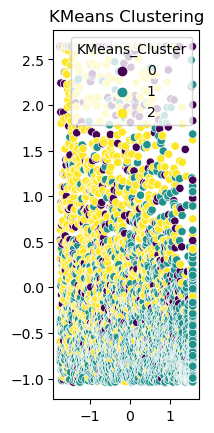

In [23]:
plt.subplot(1, 3, 1)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering')


Text(0.5, 1.0, 'Agglomerative Clustering')

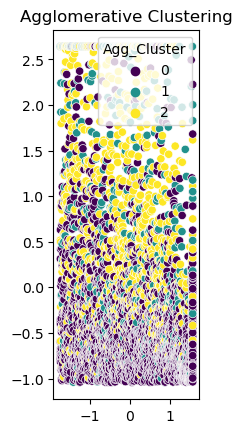

In [24]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Agg_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')

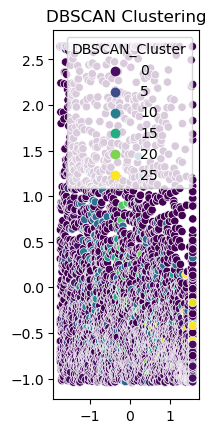

In [25]:
plt.subplot(1, 3, 3)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()

In [26]:
# Create the linkage matrix using the 'ward' method
Z = linkage(scaled_features, method='ward')

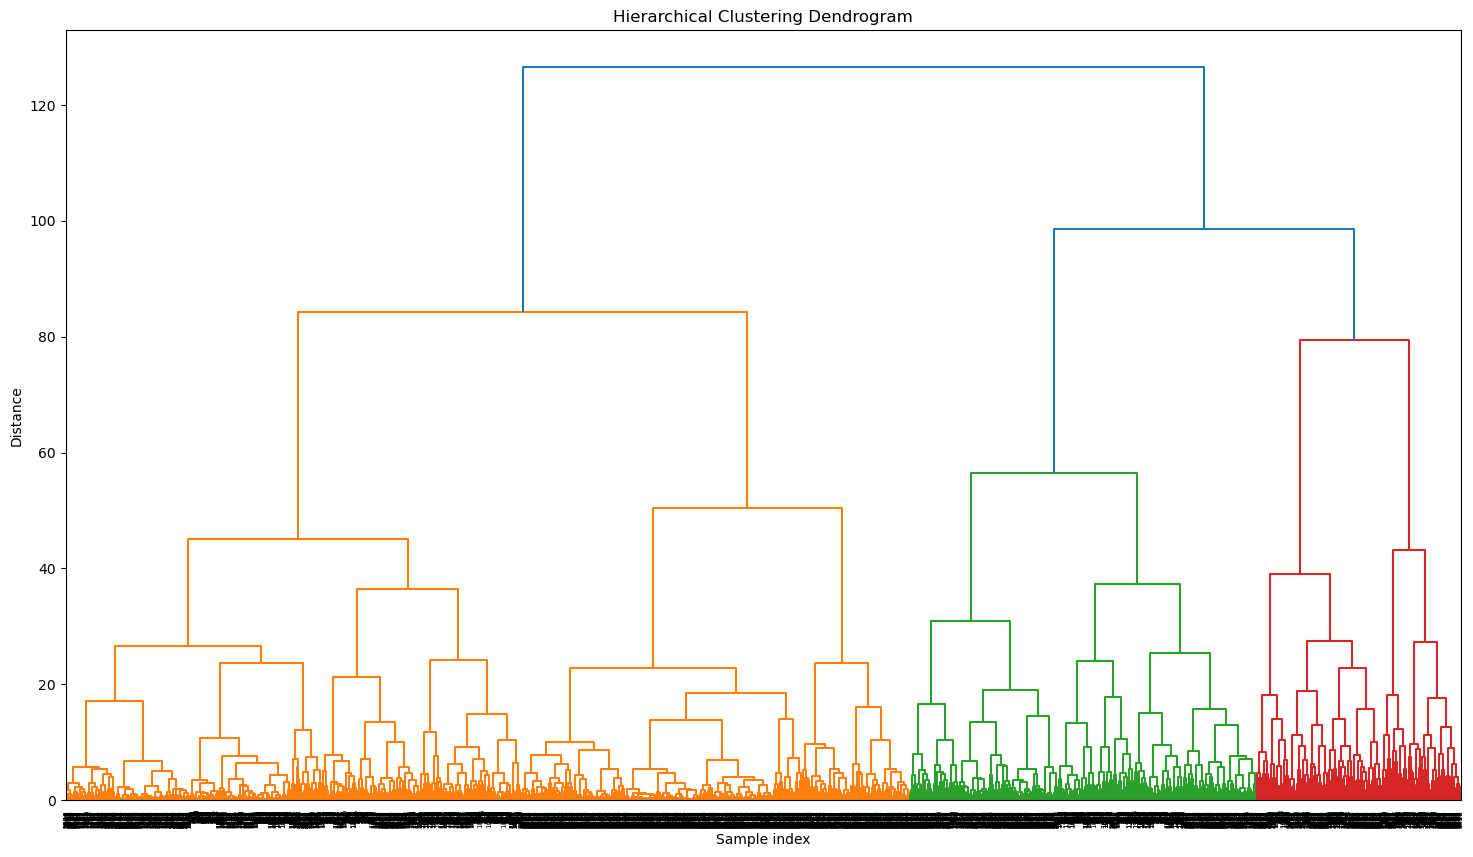

In [32]:
# Plot the dendrogram
plt.figure(figsize=(18, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.show()


In [33]:
# **Agglomerative Clustering**
# Perform Ward's linkage for hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clustering.fit(scaled_features)
data['Agg_Cluster'] = agg_clustering.labels_

In [39]:
# **Visualize the clustering results**
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'KMeans Clustering')

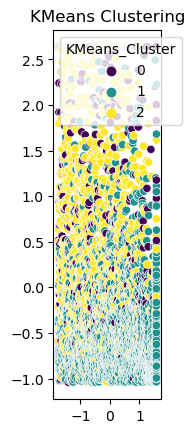

In [40]:
# KMeans
plt.subplot(1, 4, 1)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering')

C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


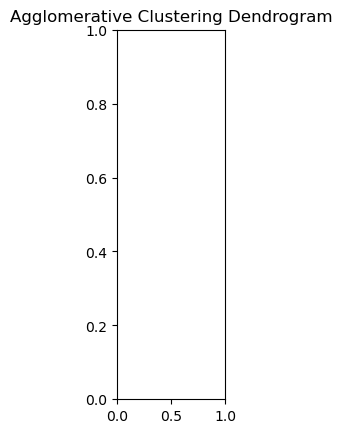

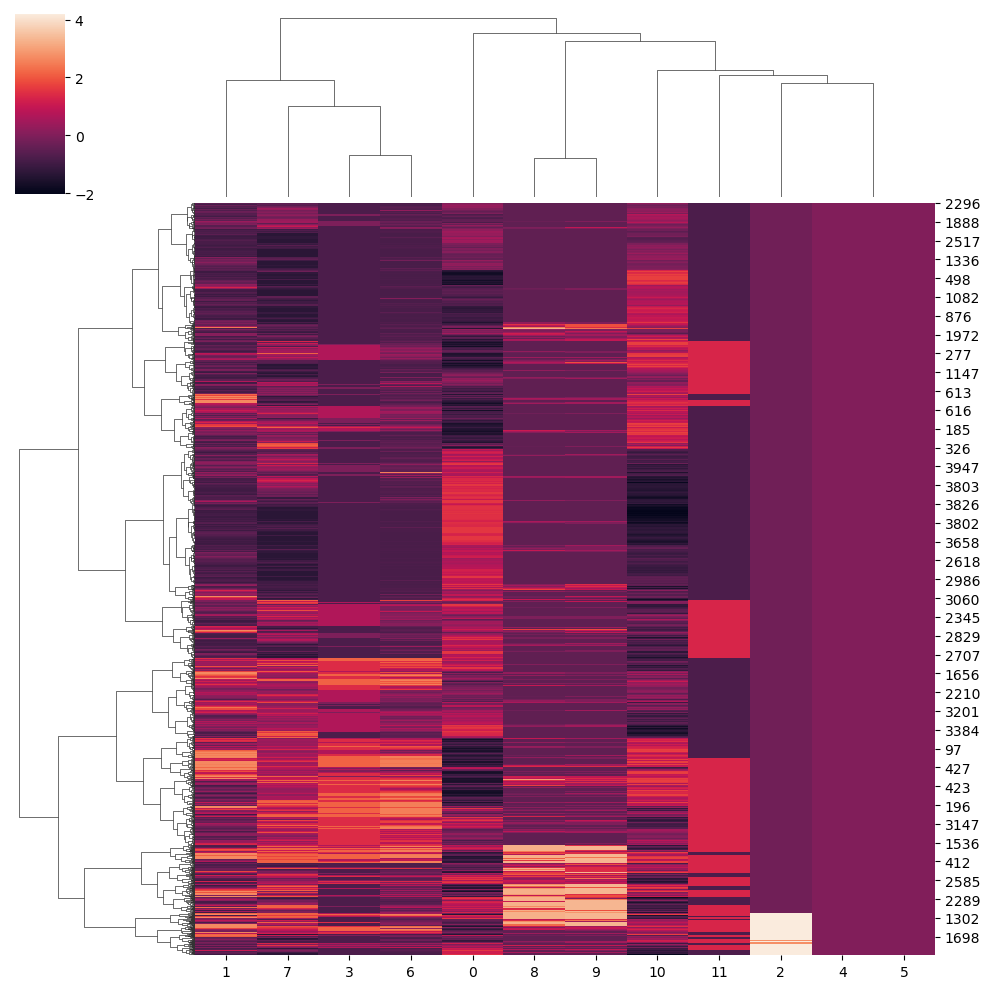

In [41]:
# Agglomerative (using dendrogram)
plt.subplot(1, 4, 2)
plt.title('Agglomerative Clustering Dendrogram')
sns.clustermap(data=scaled_features, metric='euclidean', method='ward')  # Change metric or method as needed



Text(0.5, 1.0, 'DBSCAN Clustering')

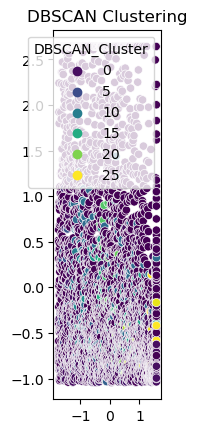

In [43]:
# DBSCAN
plt.subplot(1, 4, 3)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')

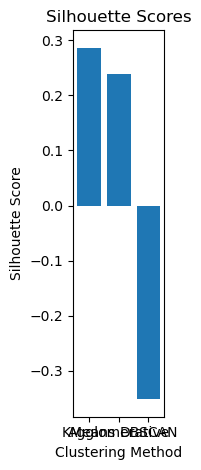

In [44]:
# Silhouette scores (optional)
plt.subplot(1, 4, 4)
plt.bar(['KMeans', 'Agglomerative', 'DBSCAN'], [kmeans_silhouette, agg_silhouette, dbscan_silhouette])
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()